## Library

In [8]:
import os
import math
import random

import numpy as np
import matplotlib.pyplot as plt

import squigglepy as sq
from squigglepy import bayes
from squigglepy.numbers import K, M, B, T

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
from datetime import datetime as dt
print('Loaded 1')

exec(open('utils.py').read())
print('Loaded 2')

exec(open('modules/tai_timelines.py').read())
print('Loaded TAI timelines module')


Loaded 1
Loaded 2
Loaded TAI timelines module


## Variables

In [9]:
# Global variables - probably don't want to change these but you could.
RUNS = 10000                                      # Number of runs to do (default 10000)
CURRENT_YEAR = 2024                               # What year to start the run on? (default: 2024)
MAX_YEAR = 2123                                   # What year to end the run on? (default: 2123)
years = list(range(CURRENT_YEAR, MAX_YEAR))
VARIABLE_SETS = {}


VARIABLE_SETS['Cotra2020'] = {
    'initial_gdp': 23*T,                  # GDP in `CURRENT_YEAR` of country that will develop TAI (default: 23 trillion)
    'algo_doubling_rate_max': 3.5,        # 90% CI, algorithms get twice as efficient every X years (maximum)
    'algo_doubling_rate_min': 2,          # 90% CI, algorithms get twice as efficient every X years (minimum)
    'min_reduction': 2,                   # 90% CI, the minimum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    'max_reduction': 5,                   # 90% CI, the maximum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    'initial_flop_per_dollar': 17.48,     # 90% CI, as of today, we can buy 10^X FLOP per $ (originally 17 for 2020)
    'flop_halving_rate': 2.5,             # 90% CI, the cost of FLOP per $ halves every X years
    'max_flop_per_dollar': 24,            # 90% CI, the cheapest FLOP will get is 10^X FLOPs per $
    'initial_pay': 9,                     # 90% CI, as of today the maximum we would pay for TAI is $10^X (originally 8.7 for 2020)
    'gdp_growth': 1.03,                   # 90% CI, GDP will increase by a factor of X each year
    'max_gdp_frac': 0.01,                 # 90% CI, the maximum % of GDP that would be spent on TAI is $10^X
    'spend_doubling_time': 2.5            # 90% CI, our willingness to spend on TAI doubles every X years
}


VARIABLE_SETS['Cotra2022'] = deepcopy(VARIABLE_SETS['Cotra2020'])
VARIABLE_SETS['Cotra2022']['initial_flop_per_dollar'] = 18.3 # (originally 18 for 2020)
print('Loaded')

Loaded


In [10]:
cotra_2020_tai_flop_size = sq.sample(load_cache_file='caches/cotra_2020')  # Cache generated in "Anchors" notebook
print('Cache from: {}'.format(dt.fromtimestamp(os.path.getmtime('caches/cotra_2020.sqcache.npy'))))

cotra_2020_tai_flop_size = [round(t, 1) for t in cotra_2020_tai_flop_size]
# 90% CI, it takes 10^X FLOP to run a transformative AI at inference.
# Note: A petaflop/s-day (pfs-day) consists of performing 10^15 neural net operations per second for one day, or a total of about 10^20 operations
VARIABLE_SETS['Cotra2020']['tai_flop_size'] = cotra_2020_tai_flop_size
sq.get_percentiles(cotra_2020_tai_flop_size)


Cache from: 2024-03-15 15:24:40.256540


{1: 25.9,
 5: 27.3,
 10: 28.3,
 20: 30.2,
 30: 32.0,
 40: 33.6,
 50: 35.2,
 60: 36.8,
 70: 38.7,
 80: 41.1,
 90: 46.1,
 95: 63.7,
 99: 68.1}

In [11]:
cotra_2022_tai_flop_size = sq.sample(load_cache_file='caches/cotra_2022')  # Cache generated in "Anchors" notebook
print('Cache from: {}'.format(dt.fromtimestamp(os.path.getmtime('caches/cotra_2022.sqcache.npy'))))
cotra_2022_tai_flop_size = [round(t, 1) for t in cotra_2022_tai_flop_size]
VARIABLE_SETS['Cotra2022']['tai_flop_size'] = cotra_2022_tai_flop_size
sq.get_percentiles(cotra_2022_tai_flop_size)

Cache from: 2024-03-15 15:25:20.183259


{1: 25.399,
 5: 26.5,
 10: 27.3,
 20: 28.5,
 30: 29.9,
 40: 31.4,
 50: 32.9,
 60: 34.5,
 70: 36.3,
 80: 38.5,
 90: 42.2,
 95: 50.20999999999986,
 99: 67.7}

## Run Cotra 2020



## SAMPLE RUN 1 ##

In this simulation:
* It takes 37.9 log FLOP (~79.4 thousand decillion) for transformative capabilities.
* Every 2 years algorithms get 2x better, with 3 log reductions possible.
* FLOP start at a cost of 17.5 log FLOP (~302.0 quadrillion) per 2024$USD.
* Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2024$USD.
* We are initially willing to pay 9.0 log 2024$USD (~995.7 million).
* This doubles every 2.5 year to a max of 1.0% of GDP (initially ~230.0 billion 2024$USD).
* GDP grows at a rate of 1.03x per year.
---
2024 - TAI takes 37.9 logFLOP which costs 20.4 log 2024$USD to buy vs. WTP at 9.0 (buys 26.5 log FLOP or 26.5 2024-log-eFLOP)
2025 - TAI takes 37.8 logFLOP which costs 20.1 log 2024$USD to buy vs. WTP at 9.1 (buys 26.7 log FLOP or 26.9 2024-log-eFLOP)
2026 - TAI takes 37.6 logFLOP which costs 19.9 log 2024$USD to buy vs. WTP at 9.2 (buys 27.0 log FLOP or 27.3 2024-log-eFLOP)
2027 - TAI takes 37.4 logFLOP which cost

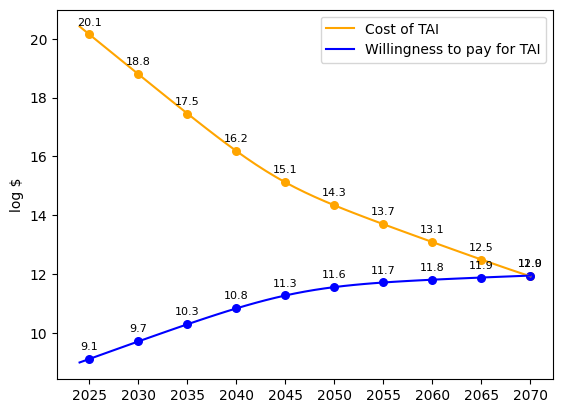



## SAMPLE RUN 2 ##

In this simulation:
* It takes 33.9 log FLOP (~7.9 decillion) for transformative capabilities.
* Every 2.5 years algorithms get 2x better, with 2 log reductions possible.
* FLOP start at a cost of 17.5 log FLOP (~302.0 quadrillion) per 2024$USD.
* Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2024$USD.
* We are initially willing to pay 9.0 log 2024$USD (~995.7 million).
* This doubles every 2.5 year to a max of 1.0% of GDP (initially ~230.0 billion 2024$USD).
* GDP grows at a rate of 1.03x per year.
---
2024 - TAI takes 33.9 logFLOP which costs 16.4 log 2024$USD to buy vs. WTP at 9.0 (buys 26.5 log FLOP or 26.5 2024-log-eFLOP)
2025 - TAI takes 33.8 logFLOP which costs 16.2 log 2024$USD to buy vs. WTP at 9.1 (buys 26.7 log FLOP or 26.8 2024-log-eFLOP)
2026 - TAI takes 33.7 logFLOP which costs 15.9 log 2024$USD to buy vs. WTP at 9.2 (buys 27.0 log FLOP or 27.2 2024-log-eFLOP)
2027 - TAI takes 33.5 logFLOP which costs 15.7 l

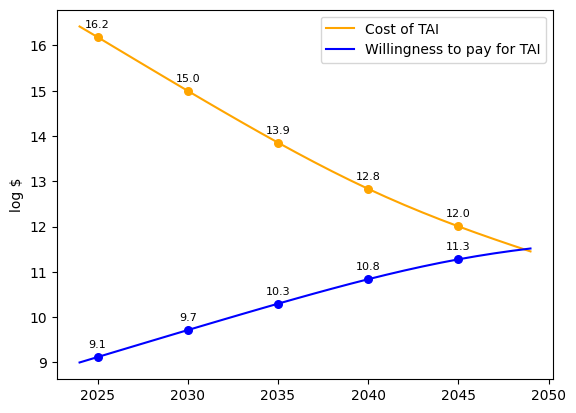



## SAMPLE RUN 3 ##

In this simulation:
* It takes 35.7 log FLOP (~501.2 decillion) for transformative capabilities.
* Every 2.0 years algorithms get 2x better, with 3 log reductions possible.
* FLOP start at a cost of 17.5 log FLOP (~302.0 quadrillion) per 2024$USD.
* Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2024$USD.
* We are initially willing to pay 9.0 log 2024$USD (~995.7 million).
* This doubles every 2.5 year to a max of 1.0% of GDP (initially ~230.0 billion 2024$USD).
* GDP grows at a rate of 1.03x per year.
---
2024 - TAI takes 35.7 logFLOP which costs 18.2 log 2024$USD to buy vs. WTP at 9.0 (buys 26.5 log FLOP or 26.5 2024-log-eFLOP)
2025 - TAI takes 35.6 logFLOP which costs 17.9 log 2024$USD to buy vs. WTP at 9.1 (buys 26.7 log FLOP or 26.9 2024-log-eFLOP)
2026 - TAI takes 35.4 logFLOP which costs 17.7 log 2024$USD to buy vs. WTP at 9.2 (buys 27.0 log FLOP or 27.3 2024-log-eFLOP)
2027 - TAI takes 35.2 logFLOP which costs 17.4

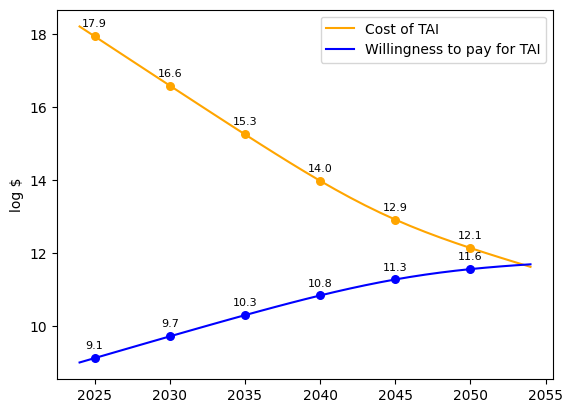



## RUN TIMELINES MODEL ##
Generating Bayes net with 5 cores...


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 7805/10000 [00:06<00:01, 1385.84it/s]

In [ ]:
variables = VARIABLE_SETS['Cotra2020']
variables['RUNS'] = RUNS
variables['CURRENT_YEAR'] = CURRENT_YEAR
variables['MAX_YEAR'] = MAX_YEAR
run_timelines_model(variables, cores=5, runs=variables['RUNS'])

## Run Cotra 2022

In [ ]:
variables = VARIABLE_SETS['Cotra2022']
variables['RUNS'] = RUNS
variables['CURRENT_YEAR'] = CURRENT_YEAR
variables['MAX_YEAR'] = MAX_YEAR
run_timelines_model(variables, cores=5, runs=RUNS)

In [ ]:
print('File last ran: {}'.format(dt.now()))